# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import os
import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")
sns.set_palette("Set2") 

In [21]:
path = os.path.join(os.getcwd(),'..' ,'data', 'data.csv')

In [22]:
data = pd.read_csv(path)

In [23]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [25]:
data.columns = data.columns.str.replace(' ', '_')

In [26]:
# Check for missing values
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [27]:
#check for duplicates
data.duplicated().sum()

0

In [28]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [29]:
#Removing unnecessary columns
data = data.drop(columns=['Unnamed:_32',"id"],axis=1)

In [30]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# EDA

In [31]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


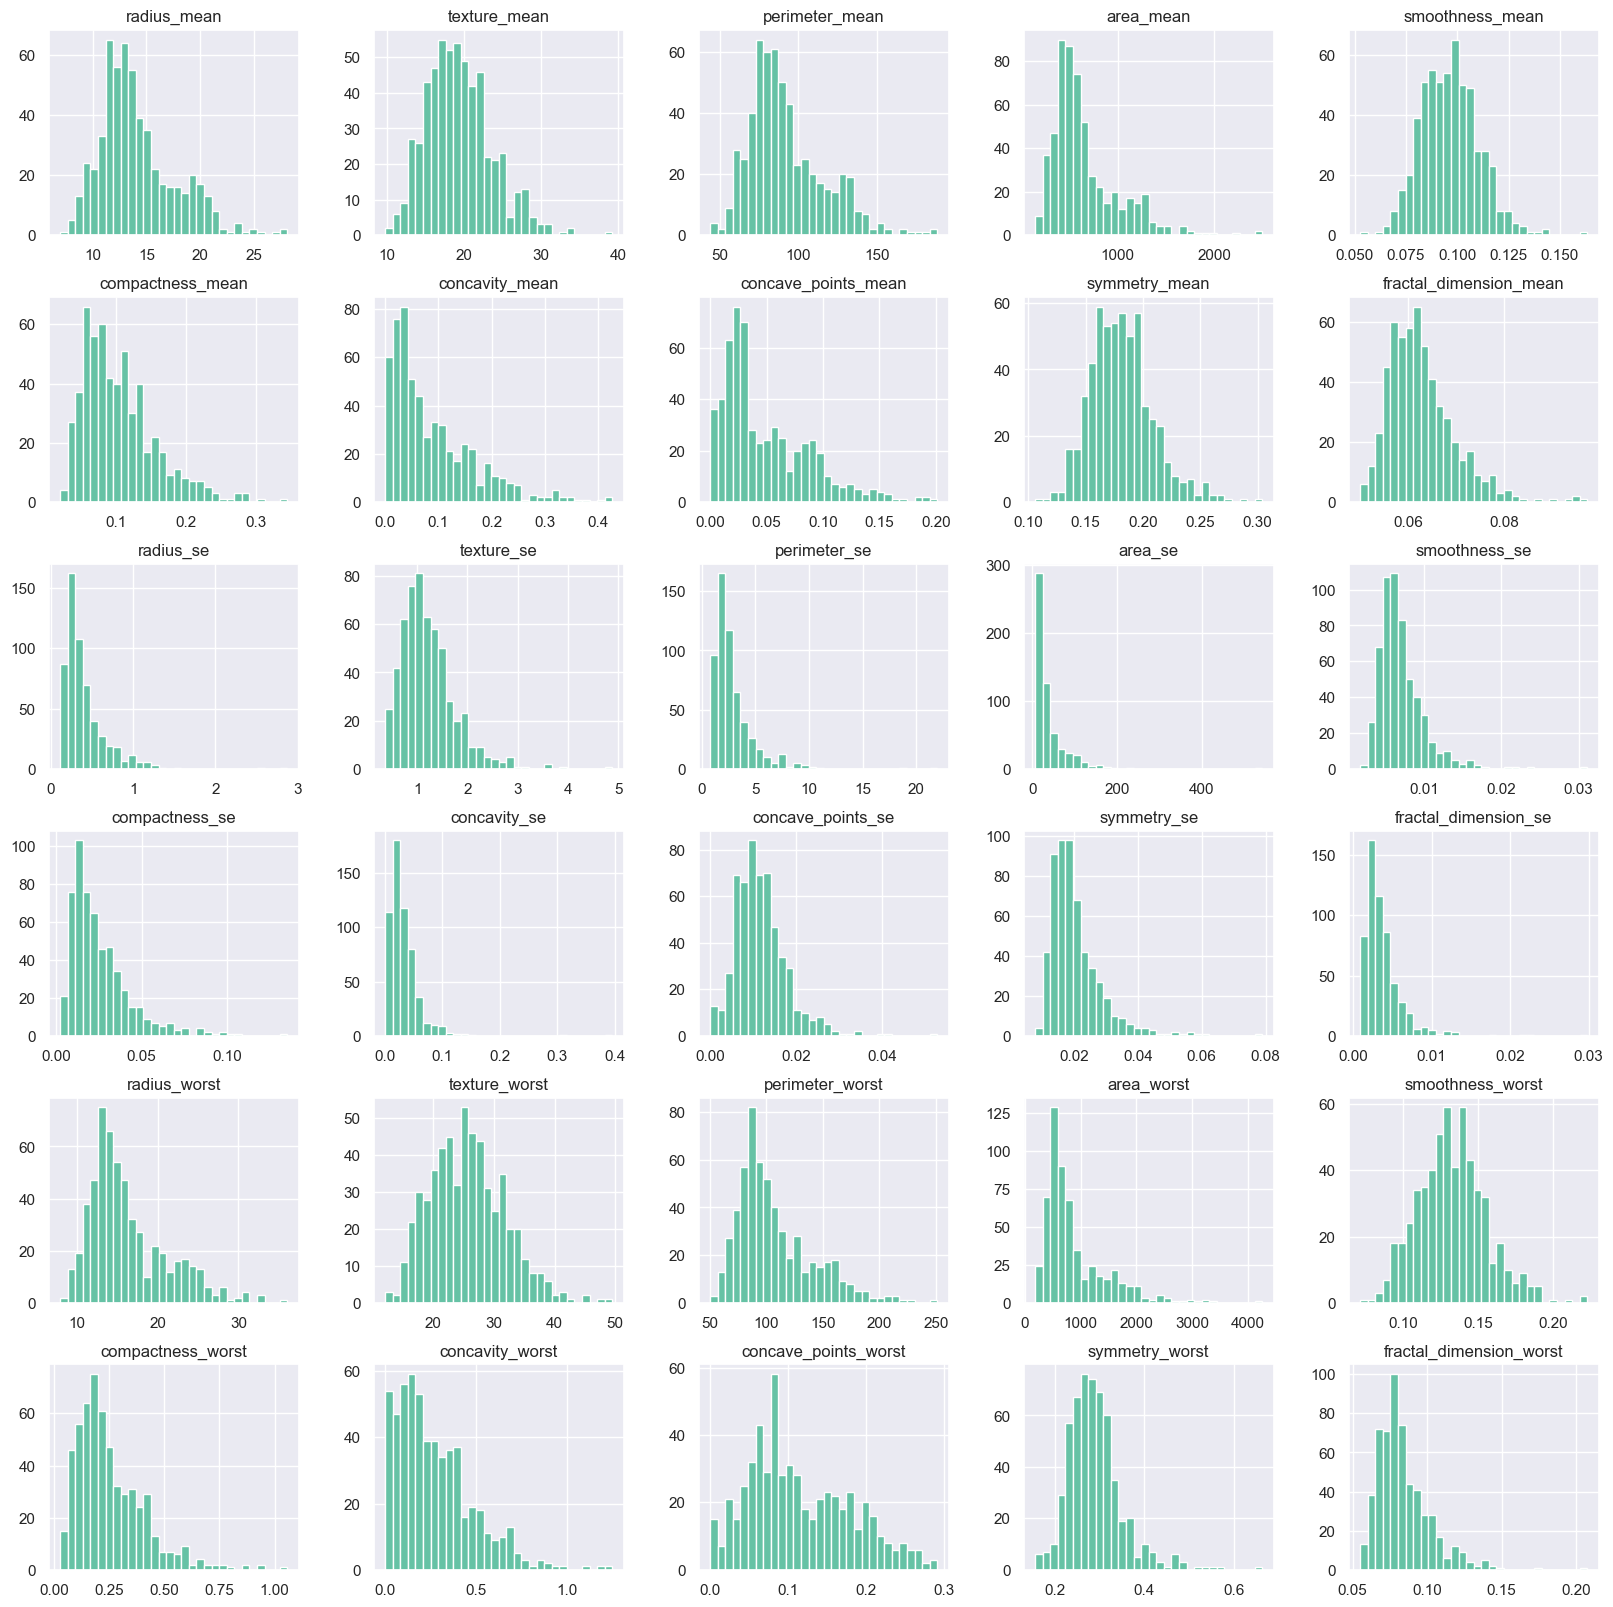

In [32]:
data.hist(figsize=(20,20),bins=30)
plt.show()

In [33]:
#check for class imbalance
data["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='diagnosis'>

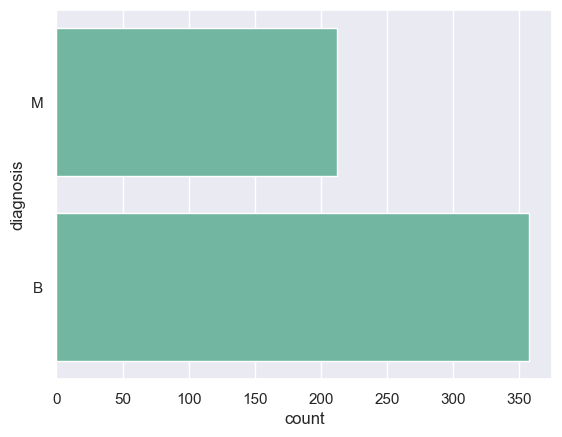

In [34]:
sns.countplot(data["diagnosis"])

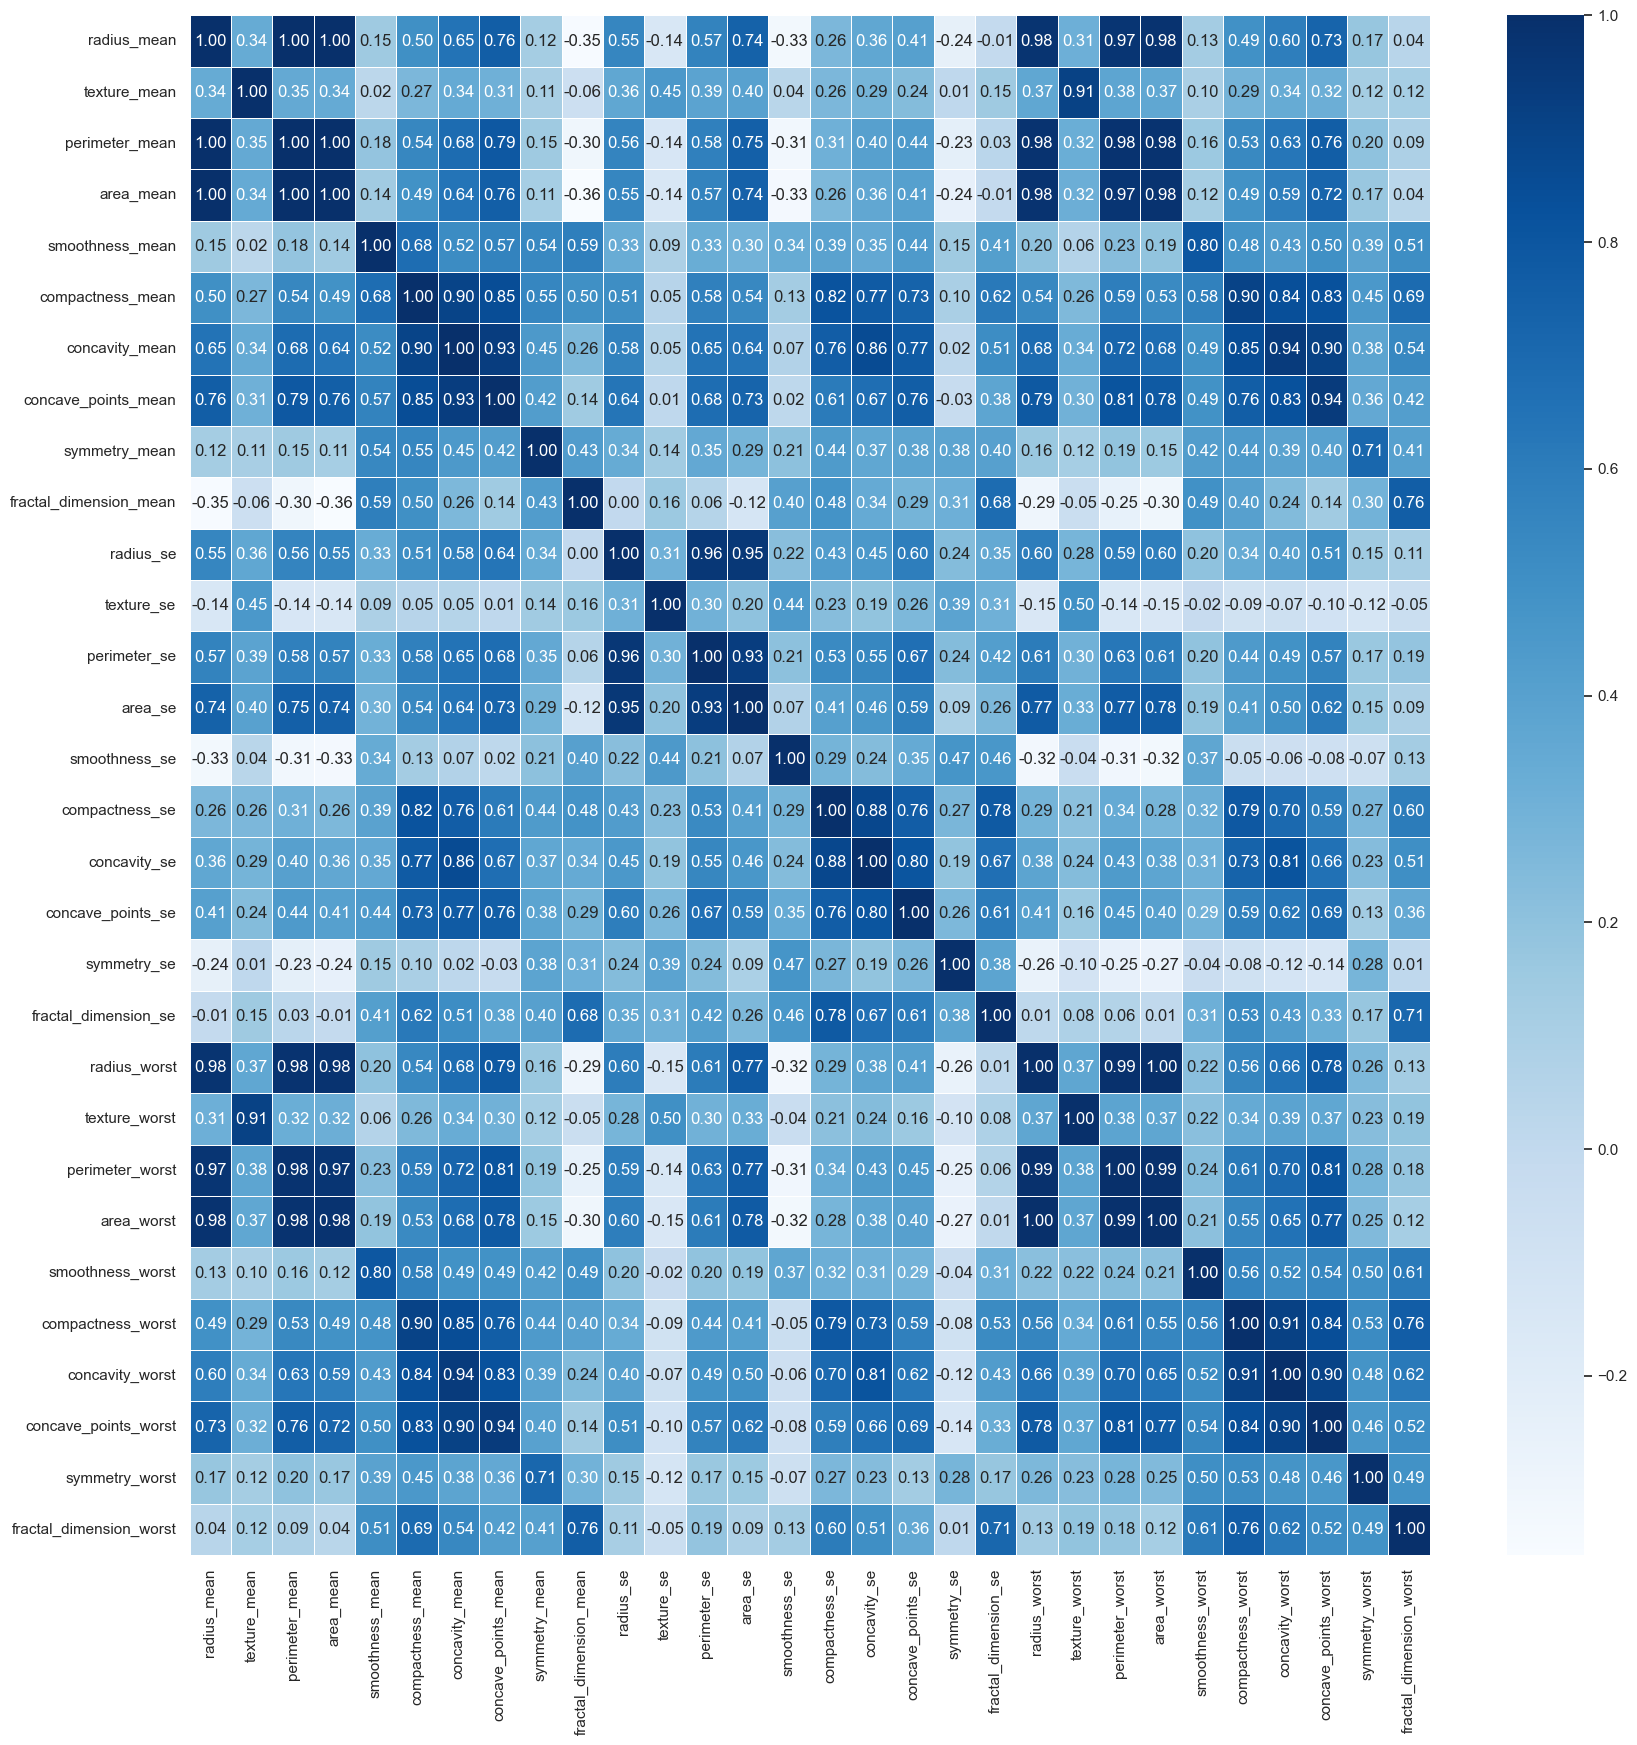

In [35]:
#correlation matrix
df_corr = data.corr(method='spearman',numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

# Data Peprocessing and feature selection

In [36]:
X=data.drop(columns=['diagnosis'])
y=data['diagnosis']

In [37]:
y = y.map({"M":1,"B":0})

In [38]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
feature_names = X.columns
# Perform ANOVA F-test
f_values, p_values = f_classif(X, y)

# Create a DataFrame for displaying results
anova_results = pd.DataFrame({'Feature': feature_names, 'F-value': f_values, 'P-value': p_values})
anova_results.sort_values(by='F-value', ascending=False, inplace=True)  # Sort by importance

# Display the results
print(anova_results)

                    Feature     F-value        P-value
27     concave_points_worst  964.385393  1.969100e-124
22          perimeter_worst  897.944219  5.771397e-119
7       concave_points_mean  861.676020  7.101150e-116
20             radius_worst  860.781707  8.482292e-116
2            perimeter_mean  697.235272  8.436251e-101
23               area_worst  661.600206   2.828848e-97
0               radius_mean  646.981021   8.465941e-96
3                 area_mean  573.060747   4.734564e-88
6            concavity_mean  533.793126   9.966556e-84
26          concavity_worst  436.691939   2.464664e-72
5          compactness_mean  313.233079   3.938263e-56
25        compactness_worst  304.341063   7.069816e-55
10                radius_se  268.840327   9.738949e-50
12             perimeter_se  253.897392   1.651905e-47
13                  area_se  243.651586   5.895521e-46
21            texture_worst  149.596905   1.078057e-30
24         smoothness_worst  122.472880   6.575144e-26
28        

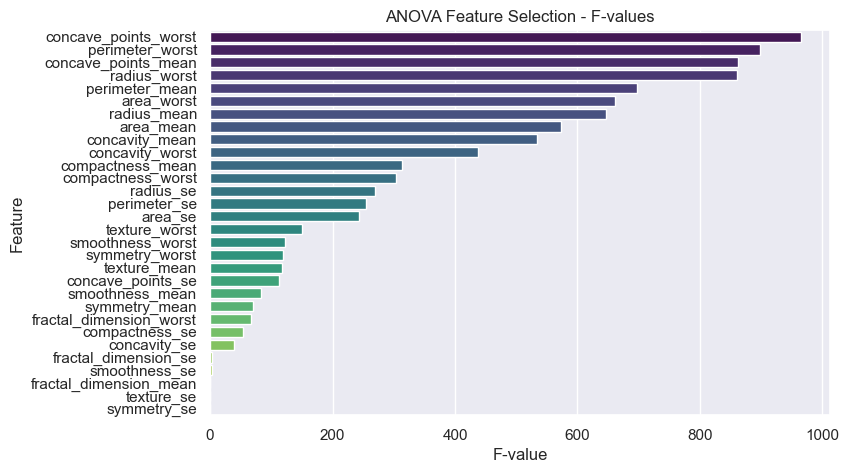

In [40]:
# Plot the F-values as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='F-value', y='Feature', data=anova_results, palette='viridis',hue='Feature')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.title('ANOVA Feature Selection - F-values')
plt.show()

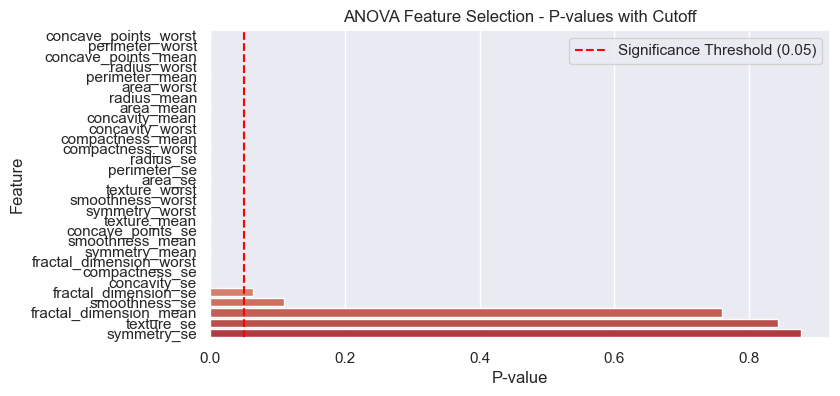

In [41]:

# 🔹 Plot the P-values with a significance threshold (0.05)
plt.figure(figsize=(8, 4))
sns.barplot(x='P-value', y='Feature', data=anova_results, palette='coolwarm',hue='Feature')

# Add a horizontal line at p = 0.05 (significance threshold)
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')

plt.xlabel('P-value')
plt.ylabel('Feature')
plt.title('ANOVA Feature Selection - P-values with Cutoff')
plt.legend()
plt.show()

In [42]:
Features_to_be_Dropped = anova_results[anova_results['P-value']>0.05].Feature
Features_to_be_Dropped

19      fractal_dimension_se
14             smoothness_se
9     fractal_dimension_mean
11                texture_se
18               symmetry_se
Name: Feature, dtype: object

In [43]:
X = X.drop(columns=Features_to_be_Dropped)

In [44]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave_points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (455, 25)
y_train.shape 	 (455,)
******************************
X_test.shape 	 (114, 25)
y_test.shape 	 (114,)


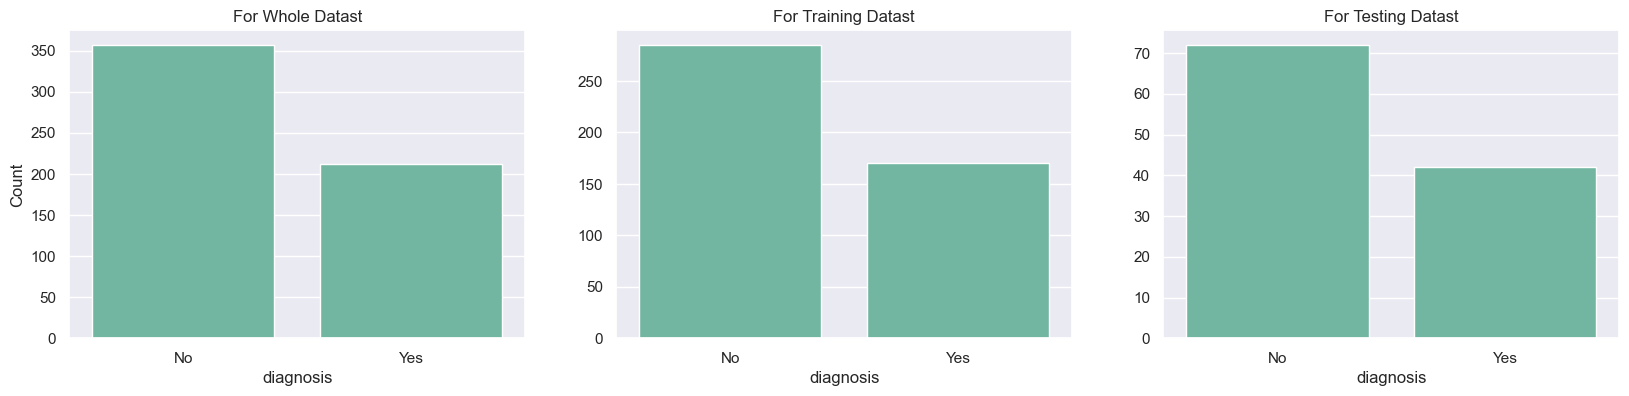

In [46]:
# plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

## Creating piplines

In [47]:
preprocessor_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [48]:
X_train = preprocessor_pipeline.fit_transform(X_train)
X_test = preprocessor_pipeline.transform(X_test)

# Dealing with imbalanced Data

### Class Weights

In [49]:
class_weights = 1-np.bincount(y_train)/len(y_train)

dict_weights = {0:class_weights[0],1:class_weights[1]}

dict_weights

{0: 0.37362637362637363, 1: 0.6263736263736264}

In [50]:
np.bincount(y_train)

array([285, 170], dtype=int64)

### Smote

In [51]:
over = SMOTE(k_neighbors=5, sampling_strategy=0.8,random_state=7)  # SMOTE to balance the class distribution
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

In [52]:
1-np.bincount(y_train_resampled)/len(y_train_resampled)

array([0.44444444, 0.55555556])

### making models folder and dumping pipeline

In [53]:
models_folder_path = os.path.join(os.getcwd(),'..','models')
os.makedirs(models_folder_path, exist_ok=True)

In [54]:
joblib.dump(preprocessor_pipeline, os.path.join(models_folder_path, 'preprocessor_pipeline.pkl'))

['g:\\depi\\technical\\projects\\Breast-Cancer-Analysis-and-ML\\notebooks\\..\\models\\preprocessor_pipeline.pkl']

# Making models

### Logistic regression with class weights

In [55]:
# Logistic Regression
log_reg = LogisticRegression(class_weight=dict_weights,C=1.0,random_state=7)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.37362637362637363, 1: 0.6263736263736264},
                   random_state=7)

In [56]:
log_reg_test_pred = log_reg.predict(X_test)
log_reg_train_pred = log_reg.predict(X_train)

score_train = f1_score(y_train, log_reg_train_pred)
score_test = f1_score(y_test, log_reg_test_pred)

print('Logistic Regression')
print('Train f1 Score:', score_train)
print("***"*10)
print('Test f1 Score:', score_test)  

Logistic Regression
Train f1 Score: 0.9823529411764705
******************************
Test f1 Score: 0.963855421686747


In [57]:
print("Accuracy score for train data:",log_reg.score(X_train, y_train))
print("***"*10)
print("Accuracy score for test data:",log_reg.score(X_test, y_test))

Accuracy score for train data: 0.9868131868131869
******************************
Accuracy score for test data: 0.9736842105263158


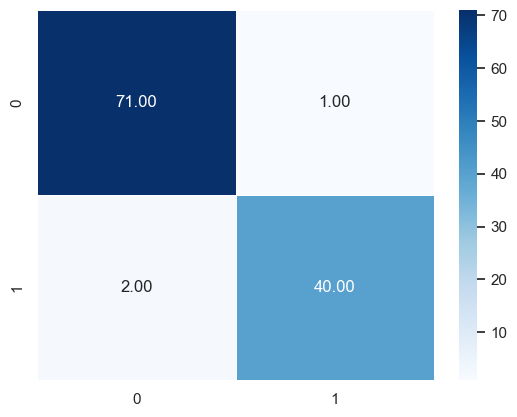

In [58]:
log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_test_pred)
sns.heatmap(log_reg_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

In [59]:
# dump the model
joblib.dump(log_reg, os.path.join(models_folder_path, 'log_reg.pkl'))

['g:\\depi\\technical\\projects\\Breast-Cancer-Analysis-and-ML\\notebooks\\..\\models\\log_reg.pkl']

### logistic regression with SMOTE

In [60]:
# Logistic Regression
log_reg = LogisticRegression(class_weight=dict_weights,C=1.0,random_state=7)
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight={0: 0.37362637362637363, 1: 0.6263736263736264},
                   random_state=7)

In [61]:
# Predictions
log_reg_test_pred = log_reg.predict(X_test)
log_reg_train_pred = log_reg.predict(X_train)
# f1 score
score_train = f1_score(y_train, log_reg_train_pred)
score_test = f1_score(y_test, log_reg_test_pred)
# Print the scores
print('Logistic Regression')
print('Train f1 Score:', score_train)
print("***"*10)
print('Test f1 Score:', score_test)  

Logistic Regression
Train f1 Score: 0.9823529411764705
******************************
Test f1 Score: 0.9512195121951219


In [62]:
# Print the accuracy
print("Accuracy score for train data:",log_reg.score(X_train, y_train))
print("***"*10)
print("Accuracy score for test data:",log_reg.score(X_test, y_test))

Accuracy score for train data: 0.9868131868131869
******************************
Accuracy score for test data: 0.9649122807017544


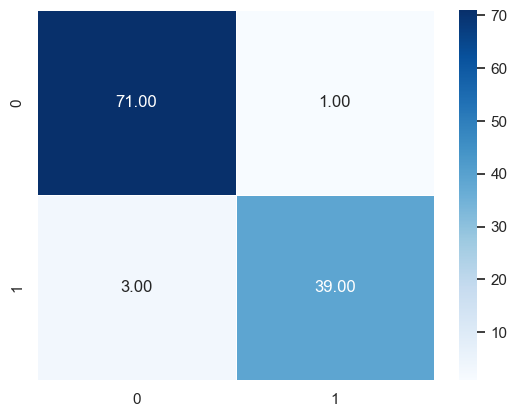

In [63]:
# Plot the confusion matrix
log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_test_pred)
sns.heatmap(log_reg_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

In [64]:
# clf report
print(classification_report(y_test, log_reg_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [65]:
k = 5  # Number of folds
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=k, scoring='f1')

# Print the cross-validation scores
print(f'Cross-validation scores (f1): {cv_scores}')
print(f'Mean cross-validation score (f1): {cv_scores.mean()}')
print(f'Standard deviation of cross-validation scores (f1): {cv_scores.std()}')

Cross-validation scores (f1): [0.97058824 1.         0.98507463 0.98550725 0.95522388]
Mean cross-validation score (f1): 0.9792787978267231
Standard deviation of cross-validation scores (f1): 0.015204725220515311


## Random Forest with class weights

In [66]:
rf = RandomForestClassifier(n_estimators=21,random_state=7,class_weight=dict_weights,max_depth=10)
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.37362637362637363,
                                     1: 0.6263736263736264},
                       max_depth=10, n_estimators=21, random_state=7)

In [67]:
# Predictions
rf_test_pred = rf.predict(X_test)
rf_train_pred = rf.predict(X_train)
# F1 Score
rf_score_train = f1_score(y_train, rf_train_pred)
rf_score_test = f1_score(y_test, rf_test_pred)
# Print the scores
print('Random Forest')
print('Train f1 Score:', rf_score_train)
print("***"*10)
print('Test f1 Score:', rf_score_test)

Random Forest
Train f1 Score: 1.0
******************************
Test f1 Score: 0.9


In [68]:
# Accuracy score
print("Accuracy score for train data:",rf.score(X_train, y_train))
print("***"*10)
print("Accuracyb score for test data:",rf.score(X_test, y_test))

Accuracy score for train data: 1.0
******************************
Accuracyb score for test data: 0.9298245614035088


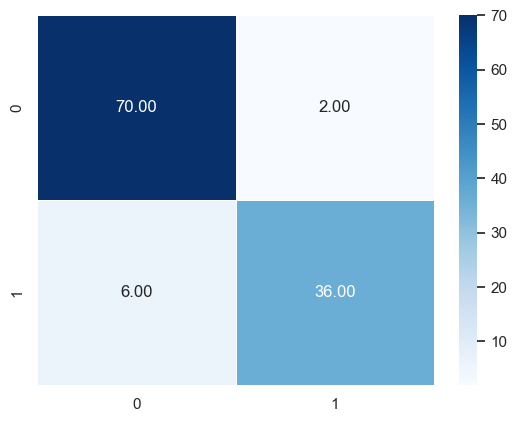

In [69]:
# Confusion Matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

In [70]:
# clf report
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



# Random forest with smote

In [71]:
rf = RandomForestClassifier(n_estimators=21,random_state=7,class_weight=dict_weights,max_depth=10)
# Fit the model
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight={0: 0.37362637362637363,
                                     1: 0.6263736263736264},
                       max_depth=10, n_estimators=21, random_state=7)

In [72]:
# Predict on the test set
rf_test_pred = rf.predict(X_test)
rf_train_pred = rf.predict(X_train)
# Calculate the F1 score
rf_score_train = f1_score(y_train, rf_train_pred)
rf_score_test = f1_score(y_test, rf_test_pred)
# Print the F1 score
print('Random Forest')
print('Train f1 Score:', rf_score_train)
print("***"*10)
print('Test f1 Score:', rf_score_test)

Random Forest
Train f1 Score: 1.0
******************************
Test f1 Score: 0.9


In [73]:
# Print the accuracy score
print("Accuracy score for train data:",rf.score(X_train, y_train))
print("***"*10)
print("Accuracyb score for test data:",rf.score(X_test, y_test))

Accuracy score for train data: 1.0
******************************
Accuracyb score for test data: 0.9298245614035088


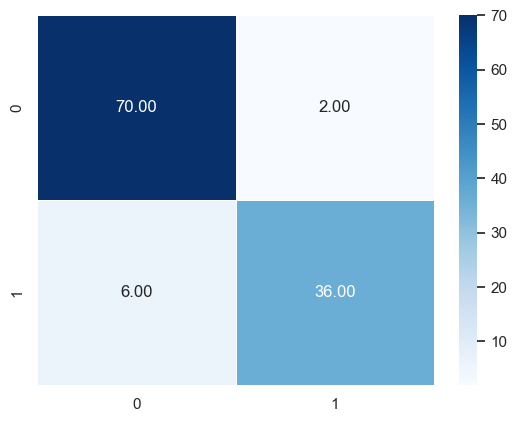

In [74]:
# Plot the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

In [75]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [76]:
k = 5  # Number of folds
cv_scores = cross_val_score(rf, X_train, y_train, cv=k, scoring='f1')

# Print the cross-validation scores
print(f'Cross-validation scores (f1): {cv_scores}')
print(f'Mean cross-validation score (f1): {cv_scores.mean()}')
print(f'Standard deviation of cross-validation scores (f1): {cv_scores.std()}')

Cross-validation scores (f1): [0.95522388 0.9375     0.95522388 0.97142857 0.96969697]
Mean cross-validation score (f1): 0.9578146604639143
Standard deviation of cross-validation scores (f1): 0.012268965358702017


### Random forest with grid search

In [77]:
rf_base = RandomForestClassifier(random_state=7,class_weight=dict_weights)
#defining the hyperparameters
param_grid = {
    'n_estimators': np.arange(5,100,6),
    'max_depth': np.arange(5,30,2)
}
# Grid search
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1,verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.37362637362637363,
                                                            1: 0.6263736263736264},
                                              random_state=7),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'n_estimators': array([ 5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95])},
             scoring='f1', verbose=4)

In [78]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 7, 'n_estimators': 89}, 0.9581771170006463)

In [79]:
rf_tuned = grid_search.best_estimator_

#predictions
rf_test_pred = rf_tuned.predict(X_test)
rf_train_pred = rf_tuned.predict(X_train)
#f1 score
rf_score_train = f1_score(y_train, rf_train_pred)
rf_score_test = f1_score(y_test, rf_test_pred)
# Print the scores
print('Random Forest tuned')
print('Train f1 Score:', rf_score_train)
print("***"*10)
print('Test f1 Score:', rf_score_test)

Random Forest tuned
Train f1 Score: 1.0
******************************
Test f1 Score: 0.8717948717948718


In [80]:
# Print the accuracy score
print("Accuracy score for train data:",rf_tuned.score(X_train, y_train))
print("***"*10)
print("Accuracyb score for test data:",rf_tuned.score(X_test, y_test))

Accuracy score for train data: 1.0
******************************
Accuracyb score for test data: 0.9122807017543859


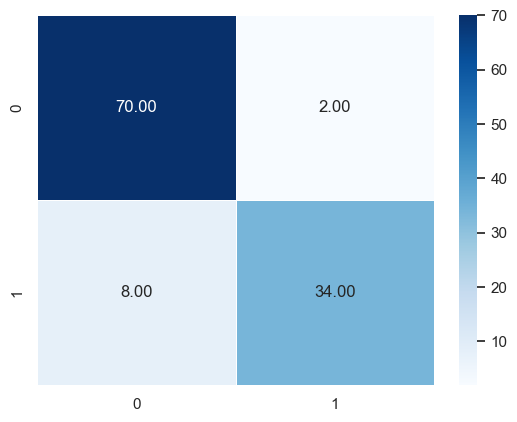

In [81]:
# Plot the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.show()

In [82]:
#classification report
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [83]:
fs = rf_tuned.feature_importances_
feature_importance = pd.DataFrame(fs,X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
feature_importance

,Importance
perimeter_worst,0.190085
concave_points_worst,0.150109
radius_worst,0.137637
area_worst,0.109833
concave_points_mean,0.094975
concavity_mean,0.072864
concavity_worst,0.049194
perimeter_mean,0.031179
area_mean,0.023678
radius_mean,0.022431


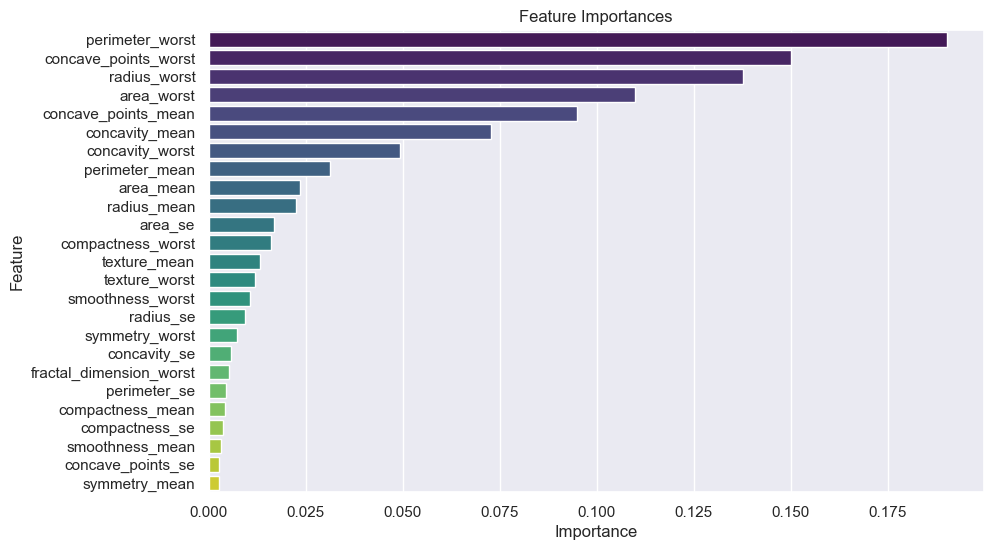

In [84]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y=feature_importance.index, data=feature_importance, palette='viridis',hue= feature_importance.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [85]:
joblib.dump(rf_tuned,os.path.join(models_folder_path, 'Random_forest_tuned.pkl'))

['g:\\depi\\technical\\projects\\Breast-Cancer-Analysis-and-ML\\notebooks\\..\\models\\Random_forest_tuned.pkl']

### XGBoost

In [86]:
xgb_base = XGBClassifier(random_state = 7, objective= 'binary:logistic',n_estimators = 89, max_depth = 5,learning_rate = 0.1,)
#fit the model
xgb_base.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=89, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [87]:
#predictions
xgb_pred_test = xgb_base.predict(X_test)
xgb_pred_train = xgb_base.predict(X_train)
#f1 score
xgb_score_train = f1_score(y_train, xgb_pred_train)
xgb_score_test = f1_score(y_test, xgb_pred_test)
# Print the scores
print('XGBoost')
print('Train f1 Score:', xgb_score_train)
print("***"*10)
print('Test f1 Score:', xgb_score_test)

XGBoost
Train f1 Score: 1.0
******************************
Test f1 Score: 0.8860759493670886


In [88]:
# Print the accuracy score
print("Accuracy score for train data:",xgb_base.score(X_train, y_train))
print("***"*10)
print("Accuracy score for test data:",xgb_base.score(X_test, y_test))

Accuracy score for train data: 1.0
******************************
Accuracy score for test data: 0.9210526315789473


<Axes: >

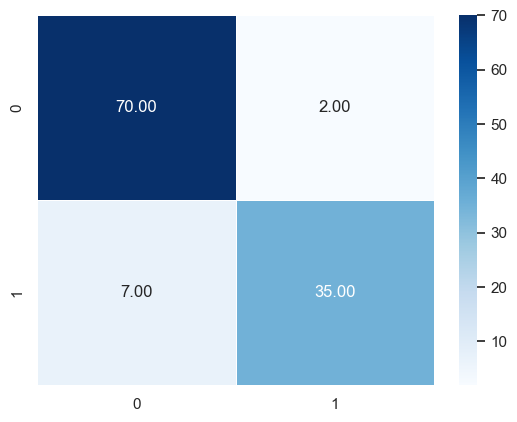

In [89]:
#confusion matrix
xgb_confusion_matrix = confusion_matrix(y_test, xgb_pred_test)
sns.heatmap(xgb_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

In [90]:
#classification report
print(classification_report(y_test,xgb_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [91]:
param_grid = {
    'n_estimators': np.arange(5,200,6),
    'max_depth': np.arange(5,30,2),
    'learning_rate': [0.1,0.01,0.001],
    'subsample':np.arange(0.5,1,0.1),
    'colsample_bytree':np.arange(0.5,1,0.1)
}
xgb_search = RandomizedSearchCV(estimator = xgb_base, param_distributions=param_grid, cv=5, scoring='f1', n_jobs=-1,verbose=4,n_iter=500)
xgb_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'n_estimators': array([  5,  11,  17,  23,  29,  35,  41,  47,  53,  59,  65,  71,  77,
        83,  89,  95, 101, 107, 113, 119, 125, 131, 137, 143, 149, 155,
       161, 167, 173, 179, 185, 191, 197]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='f1', verbose=4)

In [92]:
xgb_search.best_params_, xgb_search.best_score_

({'subsample': 0.6,
  'n_estimators': 77,
  'max_depth': 23,
  'learning_rate': 0.1,
  'colsample_bytree': 0.6},
 0.980263893812281)

In [93]:
xgb_tuned = xgb_search.best_estimator_

#predictions
xgb_test_pred = xgb_tuned.predict(X_test)
xgb_pred_train = xgb_tuned.predict(X_train)
#f1 score
xgb_score_train = f1_score(y_train, xgb_pred_train)
xgb_score_test = f1_score(y_test, xgb_test_pred)
# Print the scores
print('XGBoost tuned')
print('Train f1 Score:', xgb_score_train)
print("***"*10)
print('Test f1 Score:', xgb_score_test)

XGBoost tuned
Train f1 Score: 0.9970501474926253
******************************
Test f1 Score: 0.8717948717948718


In [94]:
# Print the accuracy score
print("Accuracy score for train data:",xgb_tuned.score(X_train, y_train))
print("***"*10)
print("Accuracy score for test data:",xgb_tuned.score(X_test, y_test))

Accuracy score for train data: 0.9978021978021978
******************************
Accuracy score for test data: 0.9122807017543859


<Axes: >

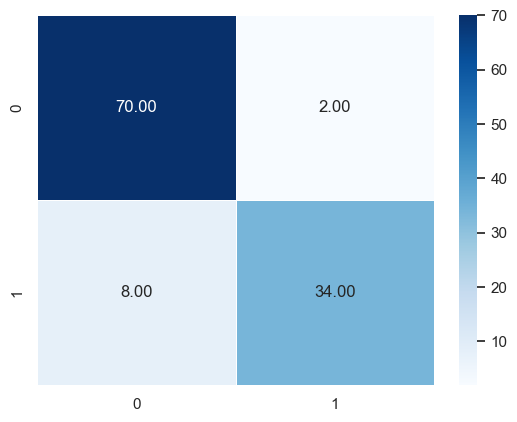

In [95]:
#confusion matrix
xgb_confusion_matrix = confusion_matrix(y_test, xgb_test_pred)
sns.heatmap(xgb_confusion_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

In [96]:
#classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [97]:
joblib.dump(xgb_tuned,os.path.join(models_folder_path, 'XGBoost_tuned.pkl'))

['g:\\depi\\technical\\projects\\Breast-Cancer-Analysis-and-ML\\notebooks\\..\\models\\XGBoost_tuned.pkl']